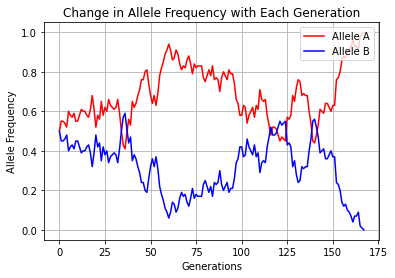

In [1]:
#Task 1

def simple_genetic_drift(): #define the function for task 1
    # Use the code from Hint to create a list representing alleles from the population and set poopulation size as 100
    pop_array = [] #initialize the list
    popsize = 100 #set population size as 100
    for i in range(0, int(popsize/2)):
        pop_array.append("A") #append "A" from index 0 until it reaches half of the poopulation size
    for i in range(int(popsize/2), popsize):
        pop_array.append("B") #append "B" from the half point to the end
    #print(pop_array) #check the list

    import random #import random function 
    allelea = [0.5] #initialize the allele count list
    alleleb = [0.5] #half of the initial poopulation is A and the other half is B
    
    for generation in range (1, 1000): #go up to 1000 generations in total
        nextgen = [] #initialize the list for next generation   
        for l in pop_array: #pop_array should contain 100 individuals,go through each of them so the number of nextgen population is the same.
            randompicks = random.randint(0,99) #draw a random number from 0 to 99 representing the index of randomly chosen individual in the list
            nextgen.append(pop_array[randompicks]) #append one by one to the new list
        pop_array = nextgen #set output from one iteration as input for the next iteration
        #print(nextgen) #check

        #Now I want to go through each element in the list and count how many times each allele ("A"/"B") appears in the list
        numa = 0
        numb = 0 #start counting from 0
        for ll in nextgen:
            if ll == "A":
                numa += 1 #numa +1 if the allele is "A"
            if ll == "B":
                numb += 1 #numb +1 if the allele is "B"
        #print(numa)
        #print(numb) #check if numa + numb = 100 and the iteration works
        #This is the count for allele A and B in the second generation, and I need to use a for loop to repeat this process for another 998 times to plot for 1000 generations.
        #and I want to append data to a list for allele A and B respectively to feed into the plot
        #comments may seem noisy and out-of-order because I modify on previous codes
        
        frea = numa / 100 #frequency for allele A equals to its count divided by the poopulation
        freb = numb / 100 #frequency for allele B equals to its count divided by the poopulation
        
        if frea != 0: #if allele A appears in the list
            allelea.append(frea) #append its frequency
        if frea == 0: #if no longer in list
            allelea.append(0) #add a 0 to the list
            break # then break the loop, no further generations should be completed
        if freb != 0: #check for allele B
            alleleb.append(freb) #append its frequency
        if freb == 0: #if no longer in list
            alleleb.append(0) #add a 0 to the list
            break #either frea or freb = 0, break the loop
        #print(len(allelea))#check if length is 1000
        #print(allelea)
        #print(alleleb)#check
    
    #now feed all data into the plot
    import matplotlib.pyplot as plt #import plot
    #x_data = range(1, 1001)
    #no need to set x_data because iteration can break at any generation
    plt.plot(allelea, "r", label='Allele A') #One line is frequency of allele A with each generation
    plt.plot(alleleb, "b", label='Allele B') #for allele B
    plt.xlabel("Generations") #label x axis
    plt.ylabel("Allele Frequency") #label y axis
    plt.legend(loc = "upper right") #set legend location
    plt.title("Change in Allele Frequency with Each Generation") #label title
    plt.grid(True) #turn on grid
    plt.show() #draw the plot
    
simple_genetic_drift() #run the function
    

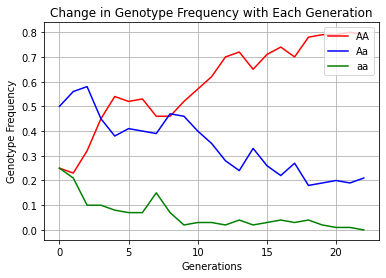

In [2]:
#Task 2

def complex_genetic_drift(): #define the function for task 2
    
    #initialize the first generation with population size of 100
    pop_array = [] #initialize the list
    popsize = 100 #set poopulation size
    for i in range(0, int(popsize/4)): 
        pop_array.append("AA") #append "AA" from index 0 until it reaches quater of the poopulation size
    for i in range(int(popsize/4), int(3 * popsize/4)):
        pop_array.append("Aa") #append "Aa" from one quater to three quater
    for i in range(int(3 * popsize/4), popsize):
        pop_array.append("aa") #append "aa" from three quater to the end
    #print(pop_array) #check the list

    #randomly select 2 parents for 100 times
    import random #import random function
    import re #import re function to split strings

    genoAA = [0.25]
    genoAa = [0.5] #initialize the genotype count for AA, Aa, aa
    genoaa = [0.25] #half of the initial population is Aa, a quater is AA, and a quater is aa
    
    for generations in range(1, 500): #iterate for up to 500 generations in total
        offsplist = [] #initialize the list for genotypes of the next generation
        for breed in range(0,100): #iteration goes for 100 times
            parents = random.sample(pop_array, 2)#use command random.sample() to randomly pick 2 parents each time
            #print(parents)#check
            offspring = [] #initialize the list for each offspring
            for oneparent in parents: #for each parent
                #print(oneparent) #check
                parent = random.sample(oneparent, 1) #randomly select 1 allele
                #print(parent) #check
                for p in parent: #the allele is a list and i turn it into a string using a for loop
                    offspring.append(p) #append the two alleles to the list representing each offspring
            #print(offspring) #check
            #The output is a list with two alleles as seperate strings
            joined = "".join(offspring) #join the two alleles using the string function join()
            #print(joined) #check
            offsplist.append(joined) #append each genotype to the next generation list
        #print(offsplist) #check
        pop_array = offsplist

        for i, v in enumerate(offsplist): #enumerate the list
            if v == "aa": #if value is "aa"
                probability1 = random.randint(1,5) #draw a random number from 1 to 5
                if probability1 == 5: #there is 20% probability to get a 5               
                    substitute = random.sample(offsplist, 1) #randomly pick a genotype from the offspring genotype list
                    for sub in substitute: #convert list to string
                        offsplist[i] = sub #replace the "aa" on that index by the random genotype
        #print(offsplist) #check
        #now count the number for each genotype, AA, Aa, and aa
        numAA = 0 
        numAa = 0
        numaa = 0 #initialize the count
        for genotype in offsplist: #go over the genotype for each individual in the poopulation
            if genotype == "AA": #if genotype is AA
                numAA += 1 #count for AA increase by 1
            if genotype == "Aa": #if Aa
                numAa += 1 #count for Aa increase by 1
            if genotype == "aA": #if aA
                numAa += 1 #count for Aa increase by 1 because genotype is the same as Aa
            if genotype == "aa": #if aa
                numaa += 1 #count for aa increase by 1
        #print(numAA)
        #print(numAa)
        #print(numaa) #check if the numbers add up to 100
    
        freAA = numAA / 100 #frequency for genotype AA equals to its count divided by the poopulation
        freAa = numAa / 100 #frequency for genotype Aa equals to its count divided by the poopulation
        freaa = numaa / 100 #frequency for genotype aa equals to its count divided by the poopulation
    
        if freAA != 0: #if AA in list
            genoAA.append(freAA) #append its frequency
        if freAA == 0: #if not in list
            genoAA.append(0) #append a 0
            break #then break
        if freAa != 0: #if Aa in list
            genoAa.append(freAa) #append its frequency
        if freAa == 0: #if not in list
            genoAa.append(0) #append a 0
            break #then break
        if freaa != 0:#if aa in list
            genoaa.append(freaa) #append its frequency
        if freaa == 0: #if not in list
            genoaa.append(0) #append a 0
            break #then break

    import matplotlib.pyplot as plt #import plot
    x_data = range(1, 501) #1st generation to 500th generation
    plt.plot(genoAA, "r", label='AA') #One line is count for/frequency of genotype AA with each generation
    plt.plot(genoAa, "b", label='Aa') #for genotype Aa
    plt.plot(genoaa, "g", label='aa') #for genotype aa
    plt.xlabel("Generations") #label x axis
    plt.ylabel("Genotype Frequency") #label y axis
    plt.legend(loc = "upper right") #set legend location
    plt.title("Change in Genotype Frequency with Each Generation") #label title
    plt.grid(True) #turn on grid
    plt.show() #draw the plot

complex_genetic_drift() #run the function
